In [11]:
import pandas as pd
import seaborn as sns
import matplotlib as plt 
import numpy as np 
import os
import json
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ben10_aliens.csv')

In [3]:
df

,alien_id,alien_name,species,home_planet,strength_level,speed_level,intelligence
0,1,Alien X,Indeedite,Andromeda Prime,7,8,6
1,2,AmpFibian,Particularite,Zantron,5,8,5
2,3,Armodrillo,Discussionite,Tierra Nova,5,4,10
3,4,Astrodactyl,Acrossite,Hala,10,7,8
4,5,Atomix,Eastite,Sirius,10,5,10
...,...,...,...,...,...,...,...
69,70,Way Big,Formite,Tierra Nova,7,8,10
70,71,Whampire,Riskite,Zygara,9,10,6
71,72,Wildmutt,Chanceite,Epsilon Eridani,8,6,10
72,73,Wildvine,Withoutite,Solaris,9,5,8


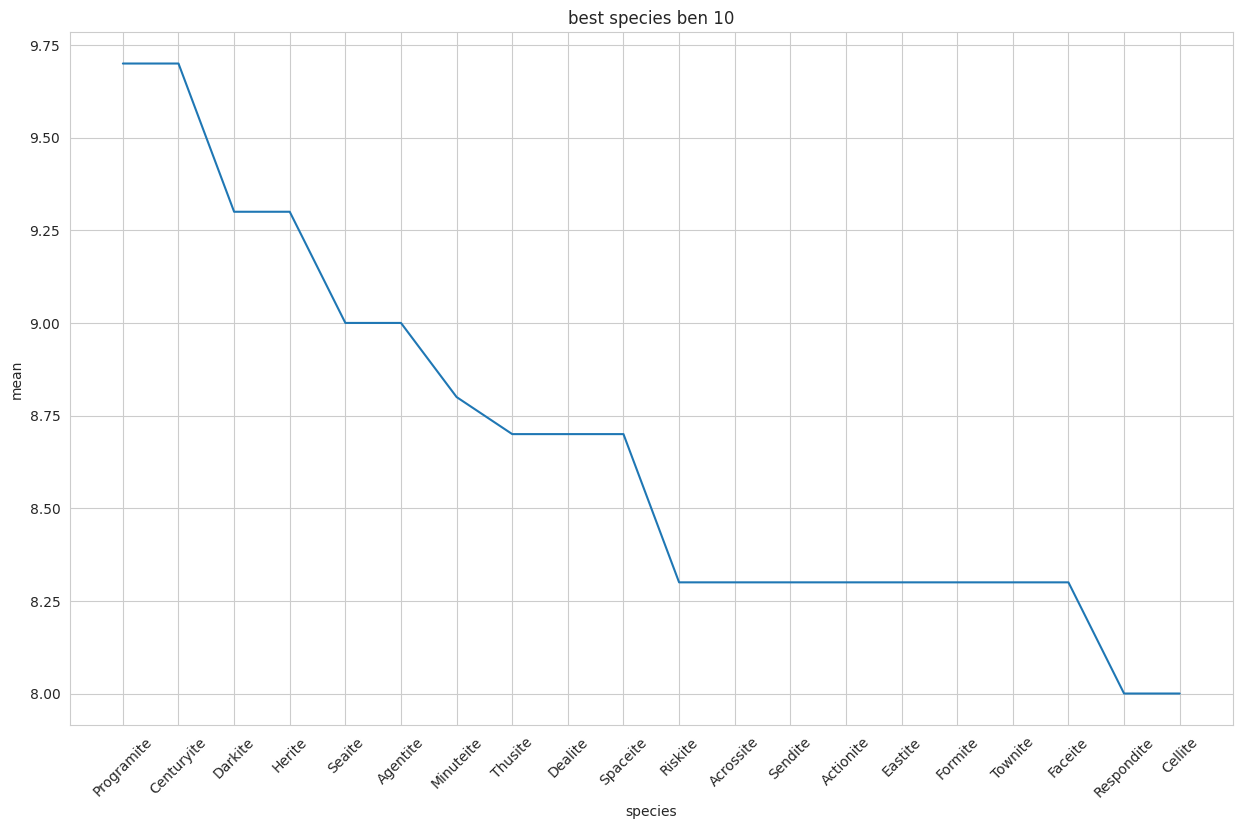

In [54]:
species = df[['species','strength_level','speed_level','intelligence']].groupby('species').mean()
species.reset_index()
species.sort_values(by = ['strength_level','speed_level','intelligence'], ascending = False , inplace = True)


species['mean'] = ((species['strength_level'] + species['speed_level'] + species['intelligence']) / 3).round(1)
species.sort_values(by = 'mean',ascending = False , inplace = True) 
species
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (15,9))
    grafico = sns.lineplot(data = species.head(20), x = 'species', y = 'mean')
    grafico.set(title = 'best species ben 10', xlabel = 'species', ylabel = 'mean')
    plt.xticks(rotation = 45)   

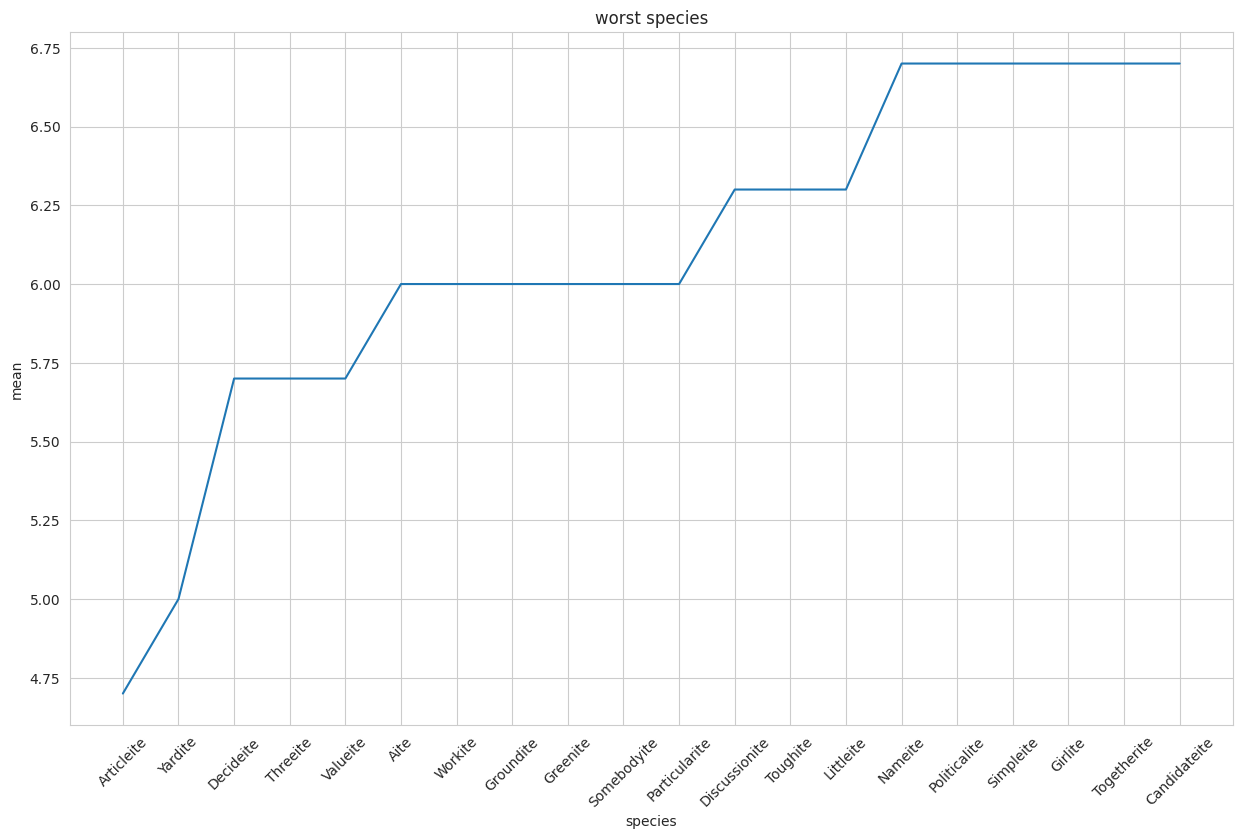

In [53]:
species.sort_values(by = 'mean', ascending = True, inplace = True)
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (15,9))
    grafico = sns.lineplot(data= species.head(20) , x = 'species', y = 'mean')
    grafico.set(title = 'worst species', xlabel = 'species', ylabel = 'mean')
    plt.xticks(rotation = 45)

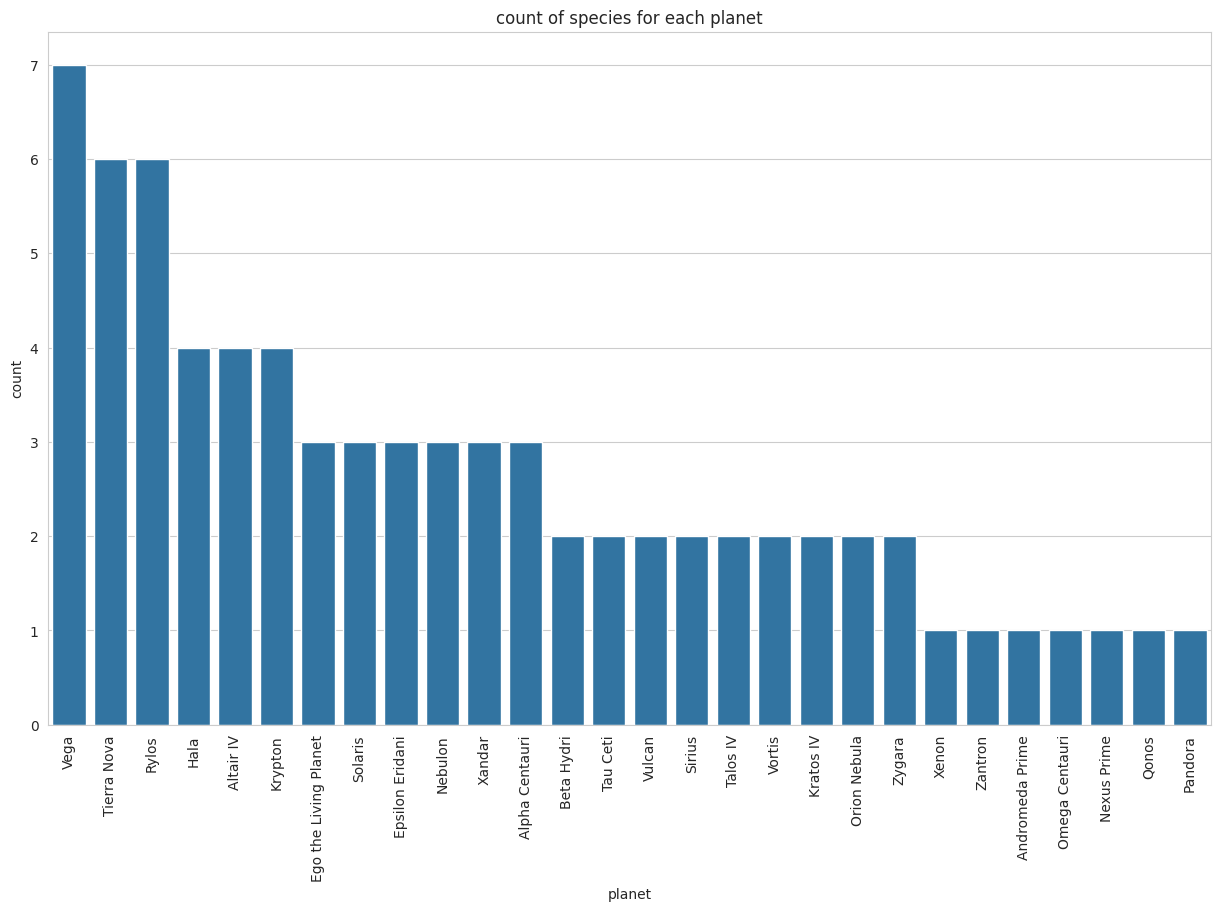

In [66]:
count_species = df['home_planet'].value_counts().reset_index()
count_species
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (15,9))
    grafico = sns. barplot(data = count_species, x = 'home_planet', y = 'count')
    grafico.set(title = 'count of species for each planet',xlabel = 'planet', ylabel = 'count')
    plt.xticks(rotation = 90)

In [67]:
df

,alien_id,alien_name,species,home_planet,strength_level,speed_level,intelligence
0,1,Alien X,Indeedite,Andromeda Prime,7,8,6
1,2,AmpFibian,Particularite,Zantron,5,8,5
2,3,Armodrillo,Discussionite,Tierra Nova,5,4,10
3,4,Astrodactyl,Acrossite,Hala,10,7,8
4,5,Atomix,Eastite,Sirius,10,5,10
...,...,...,...,...,...,...,...
69,70,Way Big,Formite,Tierra Nova,7,8,10
70,71,Whampire,Riskite,Zygara,9,10,6
71,72,Wildmutt,Chanceite,Epsilon Eridani,8,6,10
72,73,Wildvine,Withoutite,Solaris,9,5,8


In [77]:
name_aliens = df[['alien_name','strength_level','speed_level','intelligence']].sort_values(by = ['strength_level','speed_level','intelligence'], ascending = [False,False,False]).reset_index(drop = True)
name_aliens.head(20)

,alien_name,strength_level,speed_level,intelligence
0,Ball Weevil,10,10,8
1,Cannonbolt,10,10,7
2,Ultimate Spidermonkey,10,10,5
3,Ultimate Wildmutt,10,9,5
4,Astrodactyl,10,7,8
5,Frankenstrike,10,7,8
6,Terraspin,10,6,7
7,Atomix,10,5,10
8,Chromastone,10,5,6
9,Eye Guy,10,4,8


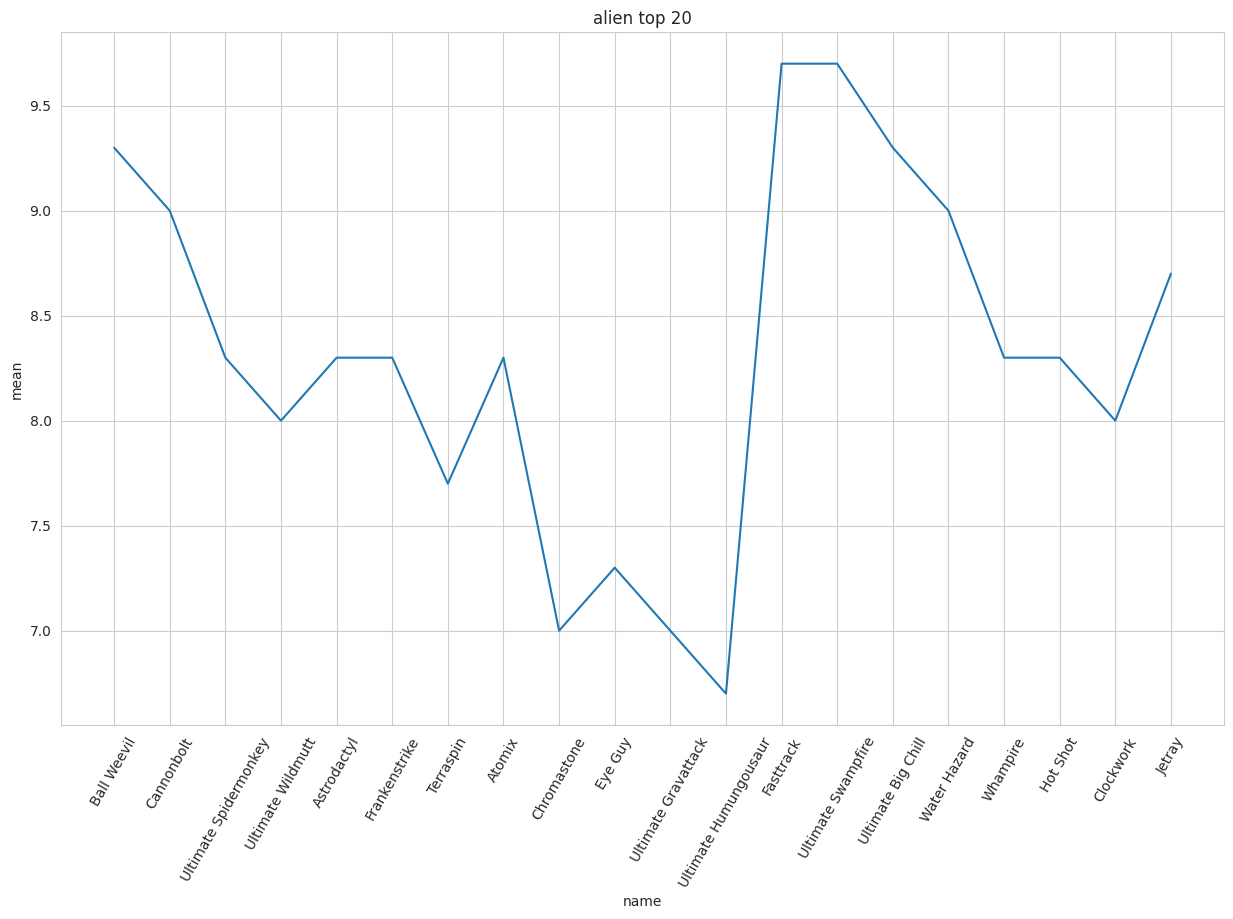

In [83]:
name_aliens['mean'] = name_aliens[['strength_level', 'speed_level', 'intelligence']].mean(axis=1).round(1)
name_aliens
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (15,9))
    grafico = sns.lineplot(data = name_aliens.head(20), x = 'alien_name',y = 'mean')
    grafico.set(title = 'alien top 20', xlabel = 'name', ylabel='mean')
    plt.xticks(rotation = 60)



In [90]:
df_batle = pd.read_csv('ben10_battles.csv')
winner = df_batle['winner'].value_counts().reset_index()
winner

,winner,count
0,Ultimate Swampfire,12
1,Ultimate Big Chill,10
2,Eatle,9
3,Toepick,9
4,Jetpack Alien,8
...,...,...
65,Spidermonkey,1
66,Echo Echo,1
67,Hot Shot,1
68,Wildvine,1


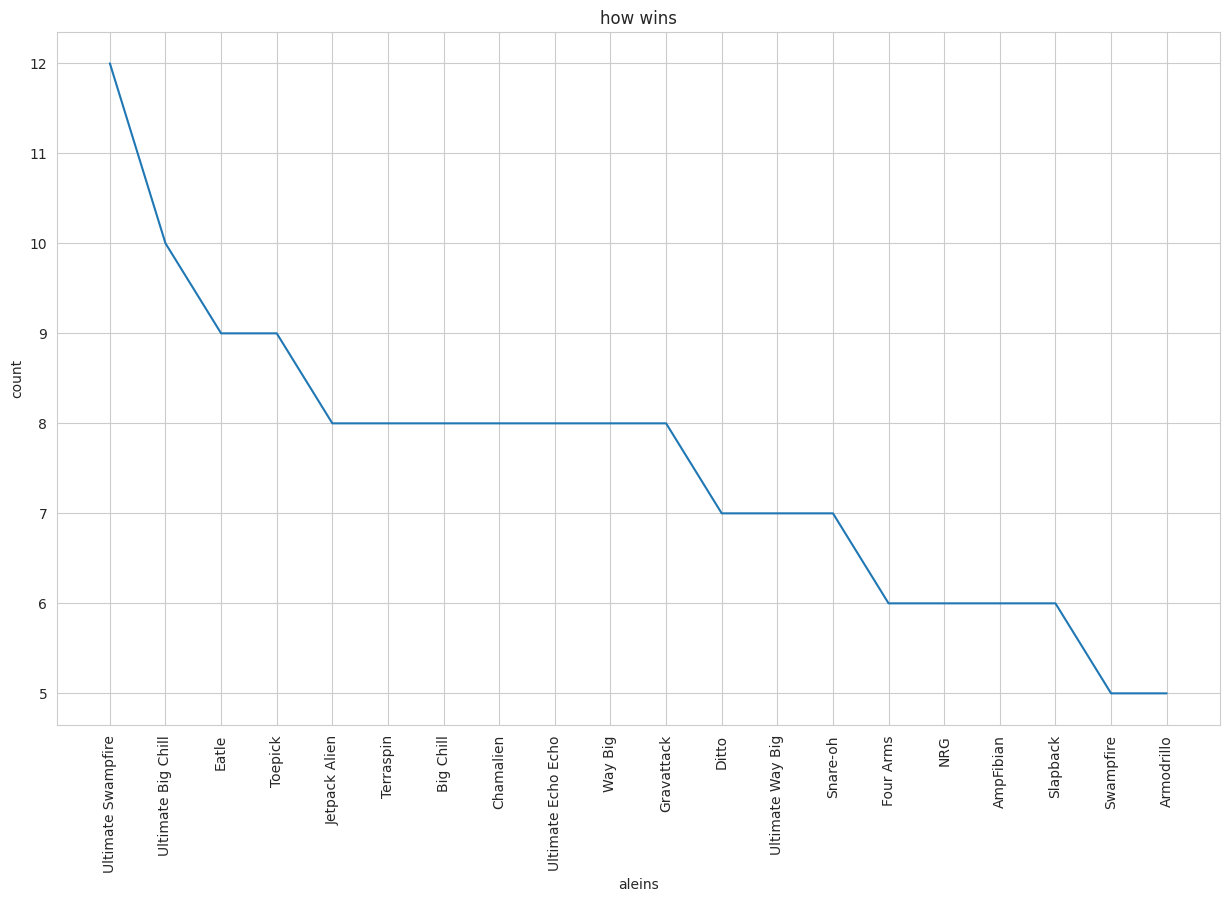

In [92]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15,9))
    grafico = sns.lineplot(data = winner.head(20), x = 'winner', y = 'count')
    grafico.set(title = 'how wins',xlabel = 'aleins', ylabel = 'count')
    plt.xticks(rotation = 90)